In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:

df = pd.read_csv('train.csv')

print(df.shape)

(42000, 785)


In [39]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
data = df.values
print(data.shape)
#Convert datframe into a numpy array


(42000, 785)


In [41]:
X = data[:,1:]
Y = data[:,0]
#All the variables go in X
#The answers to each sets of variables is in Y
print(X.shape,Y.shape)

(42000, 784) (42000,)


In [32]:
split = int(0.8*X.shape[0])
print(split)
#Not using libraries
#Causing a split to divide into test and training set
X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

336
(336, 784) (336,)
(84, 784) (84,)


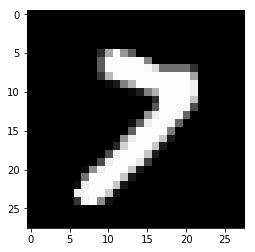

In [33]:
def drawImg(sample):
    img = sample.reshape((28,28)) #28*28
    plt.imshow(img,cmap='gray') #specifying colour
    plt.show()
    
drawImg(X_train[3]) #From head we saw that drawing was of four, so drew that

In [34]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2)) #We will find squares of distance between the two matrices
    #Then we will sum the squares
def knn(X,Y,queryPoint,k=5):
    #Writing KNN
    vals = []
    m = X.shape[0]
    #Traversing all rows
    for i in range(m):
        d = dist(queryPoint,X[i])
        #Here we will find 
        vals.append((d,Y[i]))
        #Updating array with the distance and it's value
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    #Converting into numpy
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True) #This array will store all the unique values in the second column 
    #Then it will also frequency of the numbers
    
    #print(new_vals)
    
    index = new_vals[1].argmax()
    #Here we found the index of number which came most number of times
    pred = new_vals[0][index]
    #Using that index we find the number which came most number of times
    return pred

In [35]:
pred = knn(X_train,Y_train,X_test[1])

print(int(pred))

6


In [36]:
def get_acc(X_train,Y_train,X_test,Y_test):
    
    y_pred = []
    
    for i in range(Y_test.shape[0]):
        p = knn(X_train,Y_train,X_test[1])
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==Y_test).sum())/Y_test.shape[0]


In [37]:
print(get_acc(X_train,Y_train,X_test,Y_test))
#Tried, it works but performance really bad due to excessive sampling

0.08333333333333333
